<a href="https://colab.research.google.com/github/ucchol/docker/blob/main/Data_Mining_Holt_Winters_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',\
                     index_col='Month', parse_dates=True)

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
airline.dropna(inplace=True)

In [6]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
airline.index.freq='MS'

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

#EWMA or SimpleExpSmoothing

model = SimpleExpSmoothing(airline['Thousands of Passengers'])

fittedModel=model.fit(smoothing_level=alpha, optimized=False)
airline['SES12']=fittedModel.fittedvalues.shift(-1)

airline['EWMA12']=airline['Thousands of Passengers'].\
    ewm(span=12, adjust=False).mean()

In [9]:
airline

,Thousands of Passengers,SES12,EWMA12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#airline['EXPSmooth']=ExponentialSmoothing(airline['Thousands of Passengers'],
#                    trend='mul').fit().fittedvalues.shift(-1)

# Change add and mul and show the difference 
# of trend, season, and resid of DoubleExpSmModel

DoubleExpSmModel = ExponentialSmoothing(\
                    airline['Thousands of Passengers'],\
                    trend='mul').fit()

airline['DEXPSmooth']=DoubleExpSmModel.fittedvalues.shift(-1)


<Axes: xlabel='Month'>

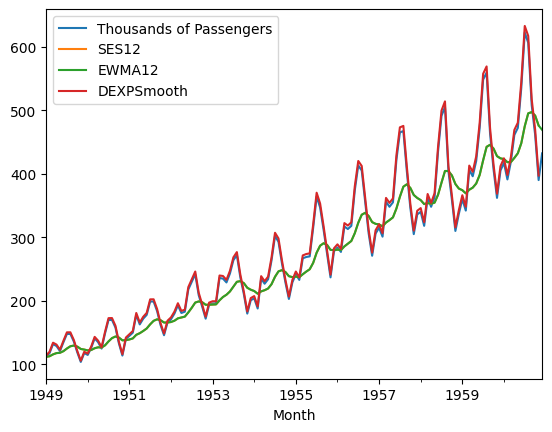

In [11]:
airline.plot()

<Axes: xlabel='Month'>

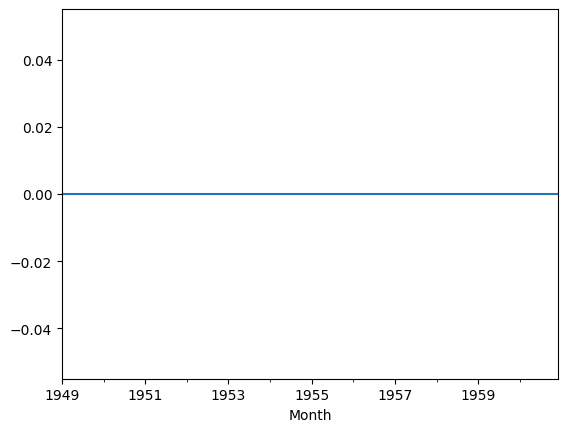

In [12]:
DoubleExpSmModel.season.plot()

<Axes: xlabel='Month'>

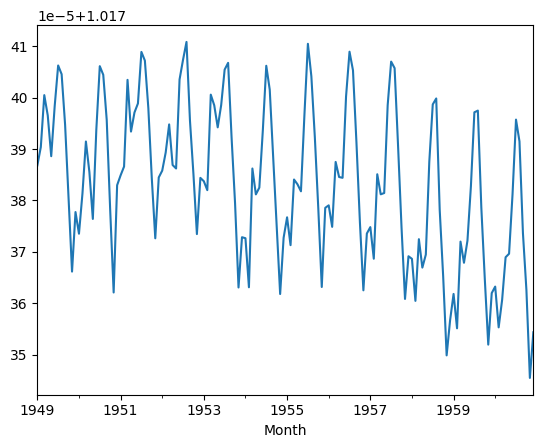

In [13]:
DoubleExpSmModel.trend.plot()

<Axes: xlabel='Month'>

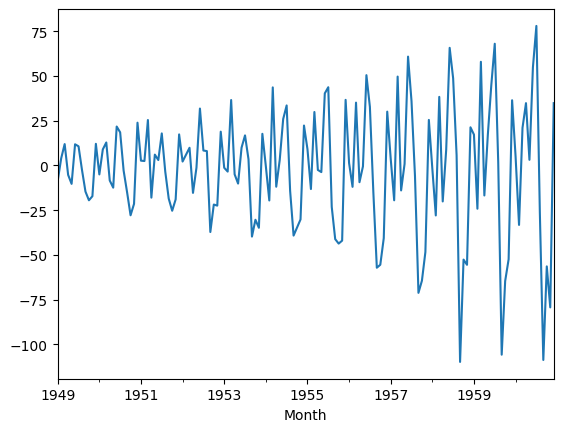

In [14]:
DoubleExpSmModel.resid.plot()

In [15]:
tripleExpModel = ExponentialSmoothing(\
                airline['Thousands of Passengers'],
                trend='mul',
                seasonal='mul',
                seasonal_periods = 12).fit()

airline['TExpSmothing12']=tripleExpModel.fittedvalues.shift(-1)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

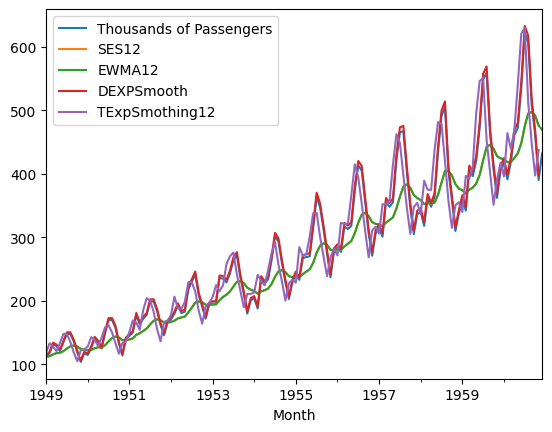

In [16]:
airline.plot()

<Axes: xlabel='Month'>

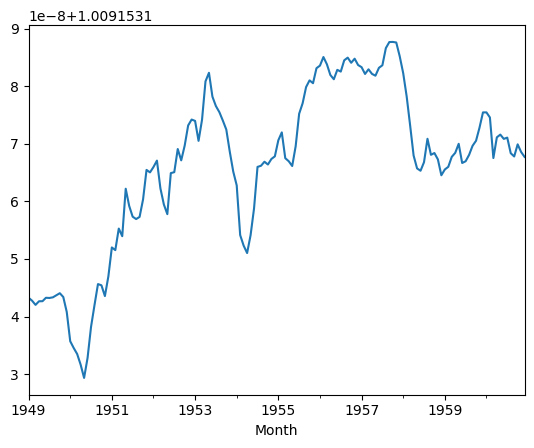

In [17]:
tripleExpModel.trend.plot()

<Axes: xlabel='Month'>

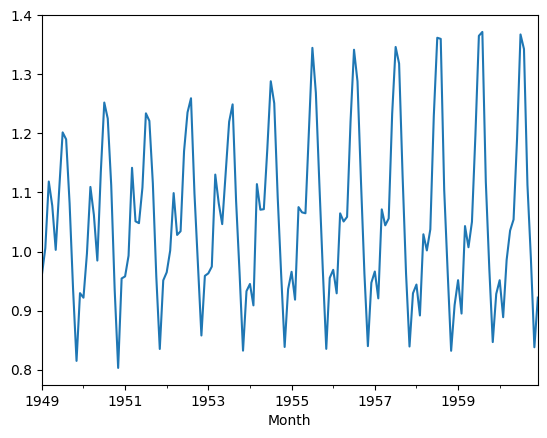

In [18]:
tripleExpModel.season.plot()

<Axes: xlabel='Month'>

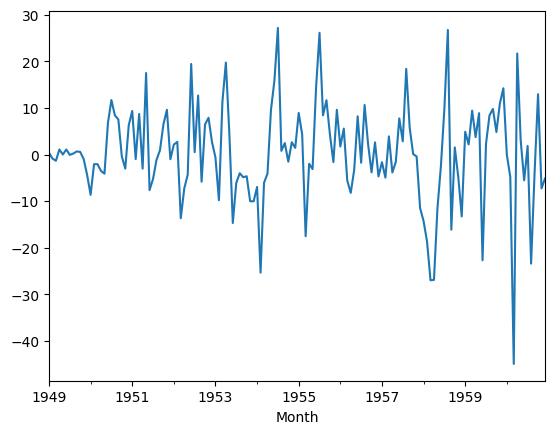

In [19]:
tripleExpModel.resid.plot()